# Predicting the Age of Abalone From Physical Measurements

#### Frame the problem and look at the big picture:

#### In this dataset, we must create a model that streamlines the process of determining the age of abalone. A more invasive and tedious approach to determining the age of an abalone is to disect it from the shell and count the rings within it. The number of rings directly correlates to the age. However, there are other physical features that are indicative of the abalone's age, and those features are to be used for training our model to predict the age of in the abalone. Essentially, this model will reduce the need to harm the abalone in order to collect data on it and monitor the growth of marine life.


#### Get the data:

#### In this dataset, we will read in the file as a csv in pandas and correctly label the columns as the features that are defined here: http://archive.ics.uci.edu/ml/datasets/Abalone. 


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/ryanmartin/Desktop/abalone (3).data", header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df = df.rename(columns={0:"Sex", 1:"Length", 2: "Diameter", 3: "Height", 4: "Whole Weight", 5: "Shucked Weight",
                  6: "Viscera Weight", 7: "Shell Weight", 8: "Rings"})

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### From the problem statement and feature discription,  we must compute the target variable of the problem ' Age' and assign it to the dataset. Age = 1.5 + Rings

In [6]:
 df['Age'] = df['Rings']+1.5
 df.drop('Rings', axis = 1, inplace = True)

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


#### Explore the data:

#### We will then explore the data by studying its attributes and characteristics. By calling the pandas info function we can see all the datatypes present in each feature in the data. This information will be useful during the feature engineering stage, where we must prepare the data for the machine learning models. 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole Weight      4177 non-null float64
Shucked Weight    4177 non-null float64
Viscera Weight    4177 non-null float64
Shell Weight      4177 non-null float64
Age               4177 non-null float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


#### Prepare the data:

#### Data preparation for this dataset will not be too intensive because we do not have any missing values.  However, we must convert the Sex feature from categorical to numeric data in order for the machine learning algorithm to use this information as indicator variables. This will add n columns to the dataframe where n is the number of classes within that feature. In our case, since we have 3 different classes in Sex (Male, Female, and Intersex), we will be adding three new columns because the function labels the instance as a 1 if it belongs to the class and 0 if it does not. The next 4 cells displays how this process occured, and In[8] shows how the columns were reorganized to keep the label we are predicting on the end of the dataframe. 

In [9]:
df = pd.get_dummies(df)
df.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


In [10]:
df = df[['Sex_F', 'Sex_I', 'Sex_M','Length', 'Diameter', 'Height', 'Whole Weight',
        'Shucked Weight', 'Shell Weight', 'Age']]

df.head()


,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole Weight,Shucked Weight,Shell Weight,Age
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.150,16.5
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.070,8.5
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.210,10.5
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.155,11.5
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.055,8.5


#### More data exploration:

#### The describe function in pandas gives us a lot of useful statistical information on the dataset in regards to the distribution, the means, and standard deviation. And the value counts function below shows how many instances belong to that certain class. In our data, most abalone are labelled as having an age of 10.5 years. It seems that very few live past the age of 25. 

In [11]:
df.describe()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole Weight,Shucked Weight,Shell Weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.312904,0.321283,0.365813,0.523992,0.407881,0.139516,0.828742,0.359367,0.238831,11.433684
std,0.463731,0.467025,0.481715,0.120093,0.099240,0.041827,0.490389,0.221963,0.139203,3.224169
min,0.000000,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.001500,2.500000
25%,0.000000,0.000000,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.130000,9.500000
50%,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.234000,10.500000
75%,1.000000,1.000000,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.329000,12.500000
max,1.000000,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,1.005000,30.500000


In [12]:
df['Age'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
25.5      2
28.5      2
3.5       1
30.5      1
2.5       1
27.5      1
26.5      1
Name: Age, dtype: int64

#### Just checking to make sure we are indeed not missing any data.

In [13]:
df.isnull().sum()

Sex_F             0
Sex_I             0
Sex_M             0
Length            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Shell Weight      0
Age               0
dtype: int64

### Create a Test Set

#### Since we are predicting the age of the abalone, and the age is directly correlated to the number of rings, we will create our test set by setting the number of rings equal to y and the rest of the features as X. However, this process will officially be done later in the notebook with train/test split. This cell just demonstrates how the data will be split. 

In [14]:
y = df["Age"]
X = df.drop(["Age"], axis = 1)
X.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole Weight,Shucked Weight,Shell Weight
0,0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.150
1,0,0,1,0.350,0.265,0.090,0.2255,0.0995,0.070
2,1,0,0,0.530,0.420,0.135,0.6770,0.2565,0.210
3,0,0,1,0.440,0.365,0.125,0.5160,0.2155,0.155
4,0,1,0,0.330,0.255,0.080,0.2050,0.0895,0.055


#### Discover and Visualize Data to Gain Insights:

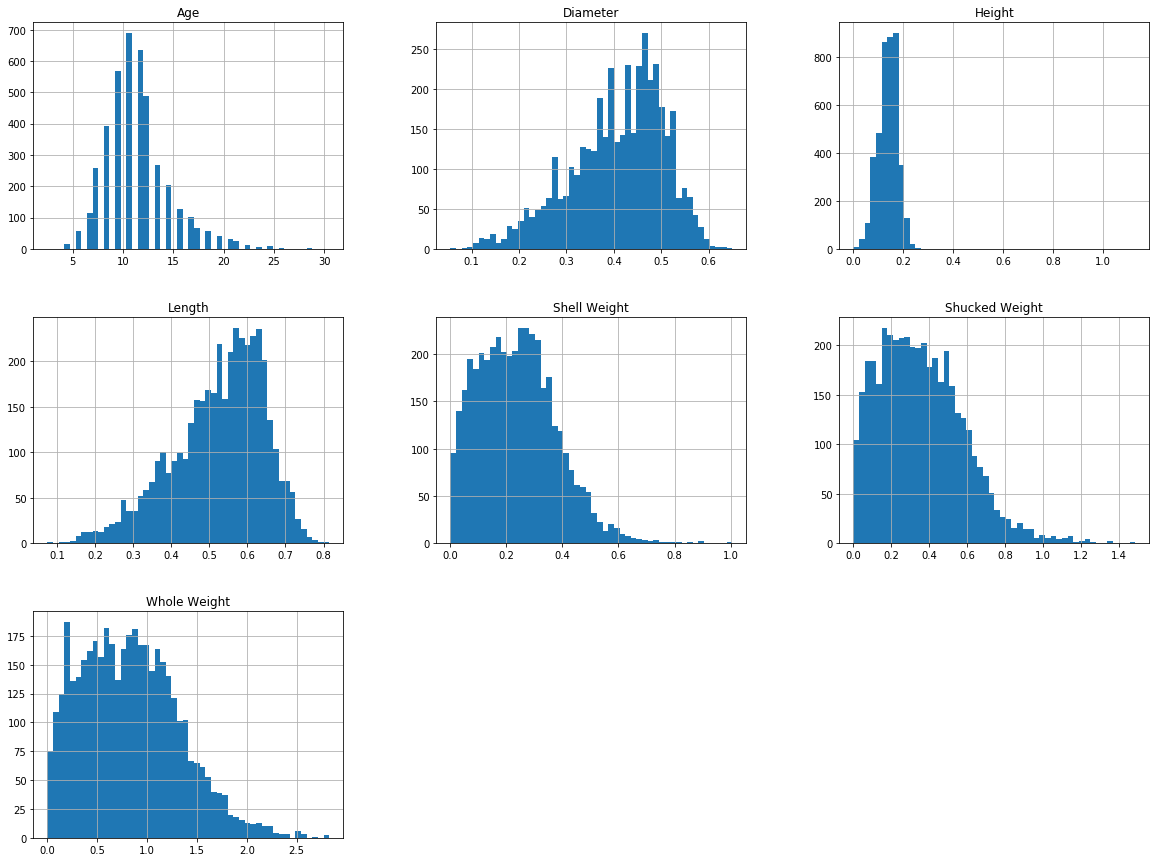

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
df.drop(["Sex_F","Sex_I","Sex_M"], axis=1).hist(bins=50, figsize=(20,15))
plt.show();

#### This graph shows that as the abalone grows in diameter, the whole weight grows exponentially. 

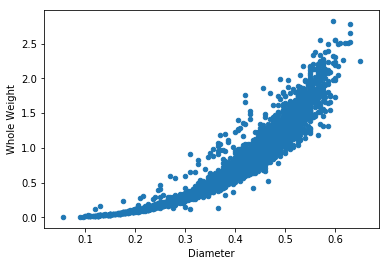

In [16]:
df.plot(kind="scatter", x ="Diameter", y= "Whole Weight");

#### By calculating the correlation between the features and age, we can see that Shell Weight, Diameter, Height, and Length are the most positively correlated features. The sex of the abalone is less correlated, but it is interesting to see that the female is most positively correlated, probably because they live longer than the males. The intersexed abalone is the only feature with a negative correlation, which means that they do not survive as long as the males and females.  

In [17]:
corr_matrix = df.corr()

In [18]:
corr_matrix['Age'].sort_values(ascending=False)

Age               1.000000
Shell Weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole Weight      0.540390
Shucked Weight    0.420884
Sex_F             0.250279
Sex_M             0.181831
Sex_I            -0.436063
Name: Age, dtype: float64

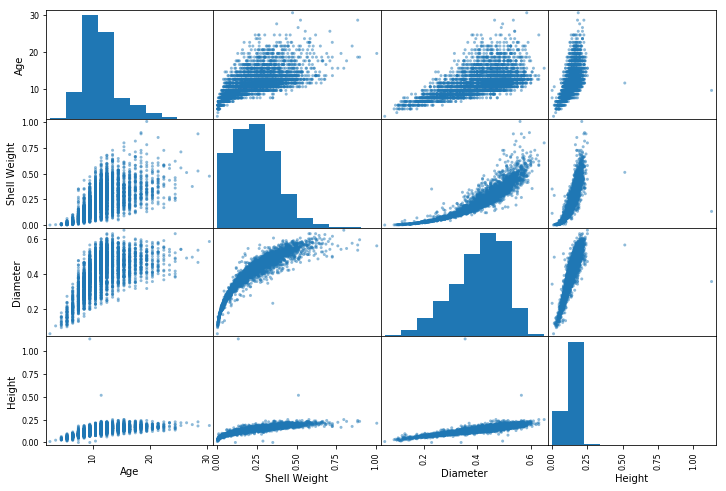

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "Shell Weight", "Diameter",
              "Height"]
scatter_matrix(df[attributes], figsize=(12, 8));

#### The graph below reveals that there is a strong correlation between the diameter of abalone and its age. There is an upward trend in the graph and the points are not too dispersed.

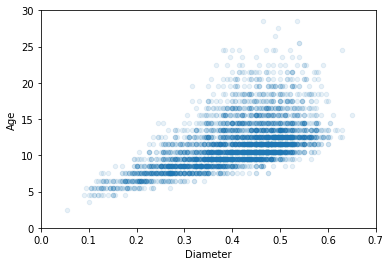

In [20]:
df.plot(kind="scatter", x="Diameter", y="Age",
             alpha=0.1)
plt.axis([0, .7, 0, 30]);

#### Attribute Combinations can increase the interestingess of our dataset.

In [21]:
df["Abalone_Mass_Index"] = df["Shell Weight"]/ df["Diameter"]

#### According to the correlation table, the "Abalone Mass Index", which is the the shell weight/ diameter, is highly correlated to the number of rings. In fact, it is more correlated than any feature in the dataset. Therefore, we will add this attribute to our dataframe to use for training our model. 

In [22]:
corr_matrix = df.corr()

In [23]:
corr_matrix["Age"].sort_values(ascending=False)

Age                   1.000000
Abalone_Mass_Index    0.663056
Shell Weight          0.627574
Diameter              0.574660
Height                0.557467
Length                0.556720
Whole Weight          0.540390
Shucked Weight        0.420884
Sex_F                 0.250279
Sex_M                 0.181831
Sex_I                -0.436063
Name: Age, dtype: float64

In [24]:
df = df.drop(["Abalone_Mass_Index"], axis=1)

## Prepare the Data for Machine Learning Algorithms

#### Because we already changed our string values to numeric values with get_dummies, and there are no missing values, we do not have too much work to do in preparing our data for machine learning models. We will add a feature to our dataset using a function transformer that will take our training data and allow us to create a function that will use the information we have to create new data. In our case, we will use the shell weight and diameter features to create the abalone mass index feature we explored in attribute combinations. This feature will then be added to our dataframe. 

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
ShellWeight_ix, Diameter_ix = [
    list(df.columns).index(col)
    for col in ("Shell Weight", "Diameter")]

In [26]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

def add_extra_features(X, add_abalone_mass_index=True):
    abalone_mass_index = X[:, ShellWeight_ix]/ X[:, Diameter_ix]
    return np.c_[X, abalone_mass_index]

attr_adder = FunctionTransformer(add_extra_features, validate=False,
                                 kw_args={"add_abalone_mass_index": False})
abalone_extra_attribs = attr_adder.fit_transform(df.values)

In [27]:
abalone_extra_attribs = pd.DataFrame(
    abalone_extra_attribs,
    columns=list(df.columns)+["abalone_mass_index"],
    index=df.index)

X = abalone_extra_attribs.drop(["Age"], axis = 1)
X.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole Weight,Shucked Weight,Shell Weight,abalone_mass_index
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.150,0.410959
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.070,0.264151
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.210,0.500000
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.155,0.424658
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.055,0.215686


#### We will  then use a standard scaler for Standarization, which will subtract the mean value and then divide it by the standard deviation so that the resulting distribution has unit variance. This will lower the effectiveness of outliers. We will print out the example transformed data just for demonstration, but this pipeline will offically fit our model in a later stage. 

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

full_pipeline = pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

abalone_prepared = full_pipeline.fit_transform(df)

In [29]:
abalone_prepared

array([[-0.67483383, -0.68801788,  1.31667716, ..., -0.60768536,
        -0.63821689,  1.57154357],
       [-0.67483383, -0.68801788,  1.31667716, ..., -1.17090984,
        -1.21298732, -0.91001299],
       [ 1.48184628, -0.68801788, -0.75948762, ..., -0.4634999 ,
        -0.20713907, -0.28962385],
       ...,
       [-0.67483383, -0.68801788,  1.31667716, ...,  0.74855917,
         0.49695471, -0.28962385],
       [ 1.48184628, -0.68801788, -0.75948762, ...,  0.77334105,
         0.41073914,  0.02057072],
       [-0.67483383, -0.68801788,  1.31667716, ...,  2.64099341,
         1.84048058,  0.64095986]])

In [30]:
abalone_prepared.shape

(4177, 10)

In [31]:
X.head()

,Sex_F,Sex_I,Sex_M,Length,Diameter,Height,Whole Weight,Shucked Weight,Shell Weight,abalone_mass_index
0,0.0,0.0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.150,0.410959
1,0.0,0.0,1.0,0.350,0.265,0.090,0.2255,0.0995,0.070,0.264151
2,1.0,0.0,0.0,0.530,0.420,0.135,0.6770,0.2565,0.210,0.500000
3,0.0,0.0,1.0,0.440,0.365,0.125,0.5160,0.2155,0.155,0.424658
4,0.0,1.0,0.0,0.330,0.255,0.080,0.2050,0.0895,0.055,0.215686


# Train Test Split

#### To avoid creating a machine learning model that would just repeat the labels that it had just seen and fail to predict any new unseen data, we must divide and set aside a portion of our data as a test set (X_test, y_test). This will help avoid the situation of overfitting our model.

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.2)

### Select and Train a Model

#### Classification and Regression

#### We will start our modelling experiment with Logistic Regression that supports multiclass labels (Softmax Regression). When given an instance, the Softmax Regression model will compute the score for each class, and then estimate the probablility of each class by applying the softmax function to the scores. 

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

In [35]:
lc = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('classifier', log_reg)])

#### We will then fit our model to our training data through the pipeline we created in the cell above. The training data first is scaled with the standard scaler to reduce the influence of outliers, then it is trained with softmax regression to estimate the probability that an instance belongs to a certain class. When given an instance i, the softmax regression model first computes a score Sk(i) for each class k, and then it estimates the probability of each class by applying the softmax function.

#### Our classification model cannot work with continuous labels, so we will "cheat" and round our y values to make this model work, although it will not be very accurate. 

In [36]:
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y.round(), random_state=0, test_size = 0.2)

In [37]:
lc.fit(X_train_clf, y_train_clf)

/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('std_scaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True))],
                          verbose=False)),
                ('classifier',
                 LogisticRegression(C=10, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [38]:
y_pred = lc.predict(X_test_clf)

#### We can now assess the accuracy of our model with cross validation, which will generate cross-validated estimates for each input data point. It will accomplish this task by taking the data and splitting it according to the cv parameter where each sample belongs to one test set and the prediction is computed with an estimator fitted on the training set. 

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(lc, X_train_clf, y_train_clf, cv=3, scoring="accuracy")

/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([0.47942755, 0.497307  , 0.46798918])

In [40]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test_clf, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.45933014354066987


#### We will evaluate the weaknesses of this classification model with a confusion matrix which will show the accuracy of each classification. 

#### By definition, a confusion matrix shows the number of observations known to be in group but predicted to be in another group.

#### Because we were attempting to predict instances belonging to many different classess, we needed to generate a multilabel confusion matrix, which provides the accuracy of each classification within each class, the abalone's age. However, because our model did poorly, we must reframe our problem and consider this as a dataset that would fit better in a regression model. We are, in fact, predicting a numeric value. Even though that numeric value represents a class, it is still a regression problem. 



In [41]:
from sklearn.metrics import multilabel_confusion_matrix

In [42]:
multilabel_confusion_matrix(y_test_clf, y_pred)

array([[[831,   0],
        [  5,   0]],

       [[777,  15],
        [ 23,  21]],

       [[630,  61],
        [ 57,  88]],

       [[430, 166],
        [ 78, 162]],

       [[467, 167],
        [100, 102]],

       [[709,  22],
        [ 99,   6]],

       [[779,  13],
        [ 41,   3]],

       [[805,   7],
        [ 22,   2]],

       [[823,   0],
        [ 13,   0]],

       [[825,   1],
        [ 10,   0]],

       [[833,   0],
        [  3,   0]],

       [[835,   0],
        [  1,   0]]])

#### Even though we will not deploy this model for this dataset, we will compute the F1 score just to be thorough in our classification attempt. 

#### The F1 score takes the weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.  

#### F1 = 2 * (precision * recall) / (precision + recall)

#### In our multi-class and multi-label case, we will show the average of the F1 score of each class (see classification report below).

In [43]:
from sklearn.metrics import classification_report

In [44]:
sk_report = classification_report(
    digits=6,
    y_true=y_test_clf, 
    y_pred=lc.predict(X_test_clf))
print(sk_report)

              precision    recall  f1-score   support

         4.0   0.000000  0.000000  0.000000         5
         6.0   0.583333  0.477273  0.525000        44
         8.0   0.590604  0.606897  0.598639       145
        10.0   0.493902  0.675000  0.570423       240
        12.0   0.379182  0.504950  0.433121       202
        14.0   0.214286  0.057143  0.090226       105
        16.0   0.187500  0.068182  0.100000        44
        18.0   0.222222  0.083333  0.121212        24
        20.0   0.000000  0.000000  0.000000        13
        22.0   0.000000  0.000000  0.000000        10
        24.0   0.000000  0.000000  0.000000         3
        30.0   0.000000  0.000000  0.000000         1

    accuracy                       0.459330       836
   macro avg   0.222586  0.206065  0.203218       836
weighted avg   0.409712  0.459330  0.419949       836



/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### The results of our softmax regression experiment were disappointing given that our accuracy was only .27 and the weighted average f1-score was .24. This dataset might respond better to a linear regression model that predicts a numeric output and is evaluated on a MSE. To be more precise, we will now attempt ridge regression to keep the weights as small as possible since we are dealing with many features that are highly correlated to the label. 

### Regression Experiment

In [45]:
from sklearn.linear_model import Ridge

In [46]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [47]:
ridge = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('classifier', ridge_reg)])

In [48]:
ridge.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('std_scaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True))],
                          verbose=False)),
                ('classifier',
                 Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
                       normalize=False, random_state=None, solver='cholesky',
                       tol=0.001))],
         verbose=False)

#### Evaluating Our Trained Model With Root Mean Square Error(RMSE) and Mean Absolute Error (MAE):

The mean squared error (MSE) measures the average of the squares of the errors, which is the average squared difference between the estimated values and the actual value. The RMSE and MAE measure the distance between two vectors: the vectors of the predictions and the vector of the target values. Usually, the RMSE score will be larger in datasets that have many outlier. This is clearly happening in our case because we have a higher norm index. 

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$


In [49]:
from sklearn.metrics import mean_squared_error

y_pred = ridge.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.1980758766383675

#### Consequently, our MSE is a smaller value and probably more reliable because we have many outliers. (See scatterplot below. )

Text(0, 0.5, 'Predicted Y')

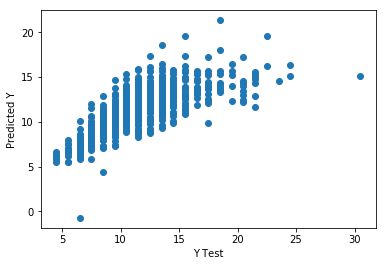

In [50]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [51]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, y_pred)
lin_mae

1.5465111654881754

#### Our MAE score means that we can predict with our model the age of the abalone within 1.5 years of its actual age based on its physical features.

## Fine Tune Our ML Model

In [52]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ridge, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
ridge_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(ridge_rmse_scores)

Scores: [2.25492973 1.99189974 2.07347097 2.22458661 1.9879511  2.21006217
 2.08479332 2.43281413 2.15729603 2.24753345]
Mean: 2.1665337244752476
Standard deviation: 0.12975408166869484


#### To avoid overfitting, we will perform a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. The best parameters will be determined by grid search techniques. Below this cell is an attempt to reach a batter MAE with a random forest model; however, this model failed to outperform our ridge regression model, so we will continue optimizing our ridge model with grid search to prevent overfitting. 

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [55]:
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2.3858534428413036

In [56]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg,  X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [2.39731815 2.09778897 2.26612651 2.17973107 2.24343353 2.36767781
 2.17874875 2.50951483 2.16357295 2.36752606]
Mean: 2.277143862498279
Standard deviation: 0.12259633405870302


In [57]:
scores = cross_val_score(ridge,  X_train, y_train, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      2.166534
std       0.136773
min       1.987951
25%       2.076302
50%       2.183679
75%       2.241797
max       2.432814
dtype: float64

### Optimizing our Ridge model with grid search. 

#### We will add feature selection to our preprocessing pipeline by selecting the best features based on univariate statistical tests. Select K best will work by removing all but the highest k scoring features. We will run this in grid search to return our best hyperparameters. 

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
                        
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0, test_size = 0.2)

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 

param  = {'alpha':[0.01, 0.1, 1,10,100],
         'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
grid_search = GridSearchCV(estimator = Ridge(random_state=10,),
param_grid = param,scoring= 'r2' ,cv = 5,  n_jobs = -1)
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

({'alpha': 0.01, 'solver': 'auto'}, 0.5399167812051203)

In [59]:
grid_search.best_params_

{'alpha': 0.01, 'solver': 'auto'}

In [60]:
grid_search.best_estimator_

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=10, solver='auto', tol=0.001)

In [61]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'alpha': 0.01, 'solver': 'auto'}
nan {'alpha': 0.01, 'solver': 'svd'}
nan {'alpha': 0.01, 'solver': 'cholesky'}
nan {'alpha': 0.01, 'solver': 'lsqr'}
nan {'alpha': 0.01, 'solver': 'sparse_cg'}
nan {'alpha': 0.01, 'solver': 'sag'}
nan {'alpha': 0.01, 'solver': 'saga'}
nan {'alpha': 0.1, 'solver': 'auto'}
nan {'alpha': 0.1, 'solver': 'svd'}
nan {'alpha': 0.1, 'solver': 'cholesky'}
nan {'alpha': 0.1, 'solver': 'lsqr'}
nan {'alpha': 0.1, 'solver': 'sparse_cg'}
nan {'alpha': 0.1, 'solver': 'sag'}
nan {'alpha': 0.1, 'solver': 'saga'}
nan {'alpha': 1, 'solver': 'auto'}
nan {'alpha': 1, 'solver': 'svd'}
nan {'alpha': 1, 'solver': 'cholesky'}
nan {'alpha': 1, 'solver': 'lsqr'}
nan {'alpha': 1, 'solver': 'sparse_cg'}
nan {'alpha': 1, 'solver': 'sag'}
nan {'alpha': 1, 'solver': 'saga'}
nan {'alpha': 10, 'solver': 'auto'}
nan {'alpha': 10, 'solver': 'svd'}
nan {'alpha': 10, 'solver': 'cholesky'}
nan {'alpha': 10, 'solver': 'lsqr'}
nan {'alpha': 10, 'solver': 'sparse_cg'}
nan {'alpha': 10, 'so

/Users/ryanmartin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004836,0.001864,0.000689,0.000086,0.01,auto,"{'alpha': 0.01, 'solver': 'auto'}",0.527018,0.553728,0.552654,0.506101,0.560102,0.539917,0.020347,1
1,0.002810,0.001037,0.000604,0.000038,0.01,svd,"{'alpha': 0.01, 'solver': 'svd'}",0.527018,0.553728,0.552654,0.506101,0.560102,0.539917,0.020347,3
2,0.002499,0.001073,0.001442,0.001680,0.01,cholesky,"{'alpha': 0.01, 'solver': 'cholesky'}",0.527018,0.553728,0.552654,0.506101,0.560102,0.539917,0.020347,1
3,0.004818,0.002341,0.000833,0.000425,0.01,lsqr,"{'alpha': 0.01, 'solver': 'lsqr'}",0.527776,0.552416,0.551985,0.495347,0.560353,0.537573,0.023771,13
4,0.003160,0.000889,0.000774,0.000327,0.01,sparse_cg,"{'alpha': 0.01, 'solver': 'sparse_cg'}",0.527777,0.552397,0.551984,0.505553,0.560354,0.539609,0.020231,11
5,0.048677,0.005919,0.001509,0.001012,0.01,sag,"{'alpha': 0.01, 'solver': 'sag'}",0.526838,0.553841,0.552619,0.506125,0.560049,0.539891,0.020362,4
6,0.089352,0.008292,0.000850,0.000427,0.01,saga,"{'alpha': 0.01, 'solver': 'saga'}",0.526642,0.553956,0.552577,0.506150,0.559985,0.539858,0.020377,5
7,0.001471,0.000287,0.000592,0.000141,0.1,auto,"{'alpha': 0.1, 'solver': 'auto'}",0.524729,0.555359,0.551967,0.507982,0.559062,0.539815,0.020002,6
8,0.001692,0.000223,0.000758,0.000279,0.1,svd,"{'alpha': 0.1, 'solver': 'svd'}",0.524729,0.555359,0.551967,0.507982,0.559062,0.539815,0.020002,8
9,0.001478,0.000633,0.000769,0.000661,0.1,cholesky,"{'alpha': 0.1, 'solver': 'cholesky'}",0.524729,0.555359,0.551967,0.507982,0.559062,0.539815,0.020002,6


## Evaluate our best model on the test set

#### Below are the results of our final model using ridge regression and grid search cv to find the best hyperparameters. This model will basically predict the age of the abalone within 2.1 years of its actual age (see final MAE) without overfitting. 

In [63]:
final_model = grid_search.best_estimator_

In [64]:
y_pred = final_model.predict(X_test)

Text(0, 0.5, 'Predicted Y')

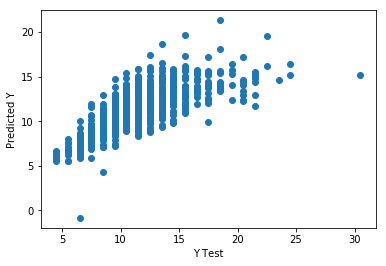

In [65]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [66]:
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, y_pred)

In [67]:
"MSE:", final_mse

('MSE:', 4.832429123001742)

In [68]:
"RMSE:", final_rmse

('RMSE:', 2.198278672735043)

In [69]:
"RMSE:", final_mae

('RMSE:', 1.5469163072850936)

In [70]:
from sklearn.model_selection import cross_val_score

final_scores = cross_val_score(final_model,  X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
final_rmse_scores = np.sqrt(-final_scores)
display_scores(final_rmse_scores)

Scores: [2.25355172 1.99070742 2.07545853 2.2255554  1.98744618 2.21091052
 2.0847361  2.43249349 2.15632327 2.24720639]
Mean: 2.1664389006674605
Standard deviation: 0.1297476823814643


#### Residual Plot:

In regression analysis, the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual (e). Each data point has one residual.

Residual = Observed value - Predicted value
e = y - ŷ

Both the sum and the mean of the residuals are equal to zero. That is, Σ e = 0 and e = 0.

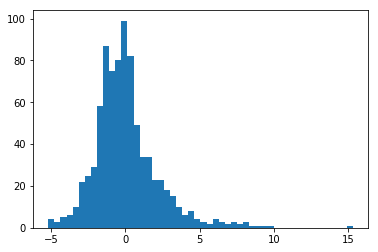

In [71]:
plt.hist((y_test-y_pred),bins=50);